<a href="https://colab.research.google.com/github/Srinu2307/Predicting-the-Sale-price-of-a-house-using-Linear-regression/blob/main/House_sales_price_detection_using_the_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the data set from the kaggle for this project: https://www.kaggle.com/code/aboodmabbas/houseprice-regression-kc-house-data/input

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 21 entries, id to sqft_lot15
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
the shape of x_train is : (16208, 19)
the shape of x_test is : (5403, 19)
the shape of y_tain is : (16208,)
the shape of y_test is (5403,)
R2 Score is : 0.8941191816961301
Mae is : 68818.83369663739
R2 Score is : 0.7806065759777443
Mae is : 98634.09679807514
R2 Score is : 0.7031780606210378
Mae is : 127262.66150046399


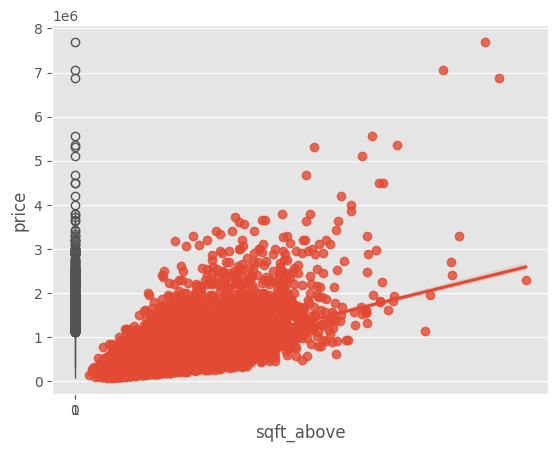

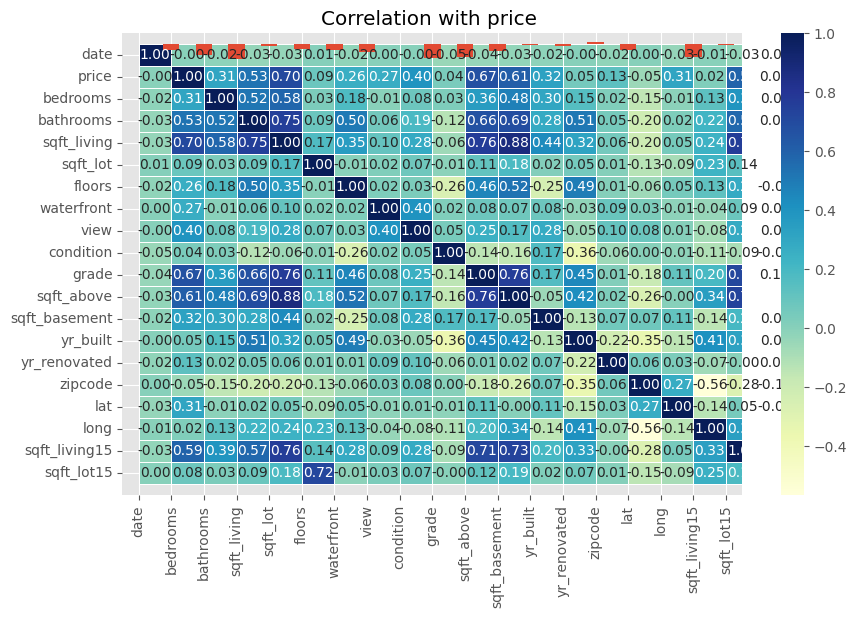

In [5]:
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
import seaborn as sns
from  warnings import filterwarnings
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# reading the csv file
#Change: Revert the file to the original to avoid the KeyError
df = pd.read_csv('/content/kc_house_data.csv')
df.head(10)
df.tail()
df.info(verbose=False)
print(df.isnull().sum())
df.describe(include='all').T
df.shape
#Change: Now the drop will succeed since the column is present.
df.drop(['id'], axis=1, inplace=True)
df.head()
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
df['date'].dtype
import numpy as np
dtype = np.dtype('int32')
df['floors'].value_counts().to_frame()
sns.boxplot(data=df, x=df['waterfront'], y=df['price'])
sns.regplot(data=df, x=df['sqft_above'], y=df['price'])
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
df.drop('price', axis=1).corrwith(df.price).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with price ")
df.skew()

#Change: Drop all NaN values
df.dropna(axis=0, how='any', inplace=True)

x = df.drop(columns='price')
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')
model1 = RandomForestRegressor(n_estimators=200, random_state=5, max_samples=0.9, max_features=0.80, max_depth=30)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

print(f'R2 Score is : {r2_score(y_test, y_pred)}')
print(f'Mae is : {mean_absolute_error(y_test, y_pred)}')

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print(f'R2 Score is : {r2_score(y_test, y_pred2)}')
print(f'Mae is : {mean_absolute_error(y_test, y_pred2)}')
model3 = LinearRegression()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

print(f'R2 Score is : {r2_score(y_test, y_pred3)}')
print(f'Mae is : {mean_absolute_error(y_test, y_pred3)}')